<a href="https://colab.research.google.com/github/GustavoBD-Dev/StatisticalTechniquesAndDataMining/blob/Time-Series/Time%20Series/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Correlación

In [ ]:
import pandas as pd
import numpy as np

base = pd.read_csv('BASE.csv')
base.corr() # correlacion entre las variables

,Año,Población,IPC,EV
Año,1.000000,0.999893,0.980805,-0.259330
Población,0.999893,1.000000,0.978980,-0.258987
IPC,0.980805,0.978980,1.000000,-0.322802
EV,-0.259330,-0.258987,-0.322802,1.000000


**Ejemplo**
Contexto: el control de contaminantes en cuerpos acuáticos se realiza principalmente por la industria textil y peletera. Sus desechos son químicamente complejos: caracterizados por los valores elevados de demanda de oxigeno químico, solidos volátiles y otros contaminantes. Se obtuvieron 33 unidades experimentales de desechos tratdos químicamente en unestudio realizado sobre el rio Lerma. Se registro la reduccion procentual de solidos totales y el procentaje de disminucion de la de demanda de oxigenos químico.

Población muestreada: "Contaminantes o desechos", solidos totales y al procentaje de disminución de demanda oxigeno.
unidad experimental: cuerpo de agua.

* Variable respuesta (variable dependiente: $f(x)$):

$x$ : reducción % de solidos

* Variable explicativa (variable independiente: $x_1 , x_2$ etc)

$y$ : demanda de oxigeno

### Correlación (numericamente)

In [ ]:
base2 = pd.read_excel('/content/ContamH2Opeletera393.xlsx')
base2.corr()

,Reduc_solidos,Red_deman_oxig%
Reduc_solidos,1.000000,0.955479
Red_deman_oxig%,0.955479,1.000000


In [ ]:
base2.describe()

,Reduc_solidos,Red_deman_oxig%
count,33.000000,33.000000
mean,33.454545,34.060606
std,11.391035,10.773055
min,3.000000,5.000000
25%,30.000000,30.000000
50%,36.000000,36.000000
75%,41.000000,40.000000
max,50.000000,51.000000


### Correlación (de forma gráfica)

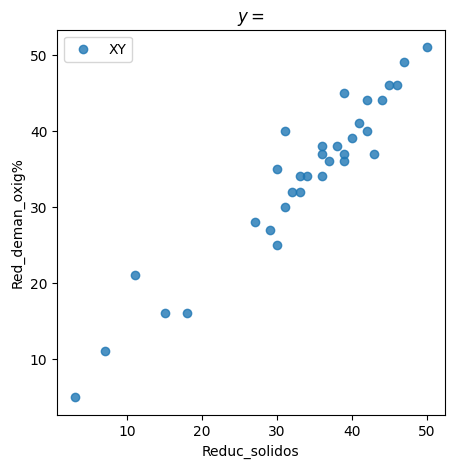

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(x=base2['Reduc_solidos'], y=base2['Red_deman_oxig%'], alpha=0.8, label= 'XY')
plt.xlabel('Reduc_solidos')
plt.ylabel('Red_deman_oxig%')
plt.legend()
plt.title('$y = \beta_0 + \beta_1 x + \epsilon$')
plt.show()

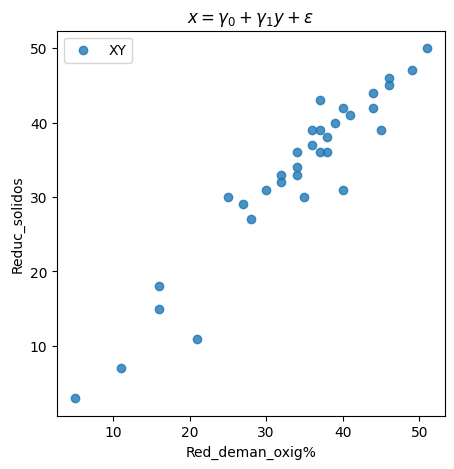

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.scatter(x=base2['Red_deman_oxig%'], y=base2['Reduc_solidos'], alpha=0.8, label= 'XY')
plt.xlabel('Red_deman_oxig%')
plt.ylabel('Reduc_solidos')
plt.legend()
plt.title('$x = \gamma_0 + \gamma_1 y + \epsilon$')
plt.show()

Gráficamente se aprecia una ALTA RELACIÓN creciente entre reduccion de sólidos y reducción de demanda de oxigeno.
La relacion entre reducción. de solido y demanda de oxigeno es ALTA (0.95)

$y = \beta_0 + \beta_1 x + \epsilon$ \
$x = \gamma_0 + \gamma_1 y + \epsilon$

### Estimación de $\beta_0 y \beta_1$ en una regresión lineal

Dada una regresión lineal simple:

donde:
- $y$ es la variable dependiente
- $x$ es la variable independiente
- $\beta_0$ es el intercepto
- $\beta_1$ es el coeficiente dependiente
- $\epsilon$ es el término de error

In [ ]:
import statsmodels.api as sm # estimacion y validacion de regresion

#iniciamos el proceso de la determinacion del modelo de regresion linea
X = pd.DataFrame({'beta0' : np.ones(base2.shape[0]),
                  'beta1' : base2['Reduc_solidos']})

# definimos la variable respuesta
y = base2['Red_deman_oxig%']

# opcion para sustituir 'X'
modelo = sm.OLS(y, X) # Especificamos el modelo a usar
modelo = modelo.fit() # Ajsutamos el modelo
print(modelo.summary()) #

                            OLS Regression Results                            
Dep. Variable:        Red_deman_oxig%   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     325.1
Date:                Sat, 27 Jul 2024   Prob (F-statistic):           5.48e-18
Time:                        17:46:59   Log-Likelihood:                -84.481
No. Observations:                  33   AIC:                             173.0
Df Residuals:                      31   BIC:                             176.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0          3.8296      1.768      2.166      0.0

Donde:

- t: estadístico de prueba (2.166).
- $P>|t|$ que es conocido como el *p-value*.
- $[0.025 - 0.975]$ : intervalo de confianza.

¿correlación?

Con $R = 0.95$, se determina que existe *correlacion lineal positiva* entre solidos y demanda de oxigeno.

Estimación:

$$\hat{y} = 3.82 + 0.9x$$


Interpretación de los coeficientes:


- ¿$\beta_1 + 0.9$ ?: *a medida que aumenta la variable explicativa aumenta la variable respuesta*. Es la aportacion a la variable demanda de oxigeno por cada unidad de % de solidos. para todos los coeficientes.


### Validación


* Intervalos de confianza

  Confianza $[0.025 - 0.975]$, **0.025** izquierda y **0.975** derecha.

como se usan los intervalos:

$$\hat{\beta}-t_{\frac{n}{2}, n-2}s^*\sqrt{\frac{n}{(n-2)S_{xx}}}<\beta_0<\hat{\beta}+t_{\frac{n}{2}, n-2}s^*\sqrt{\frac{n}{(n-2)S_{xx}}}$$

donde: $$s^*=\sqrt{\frac{1}{n}*(S_{yy} - \hat{\beta_i}S_{xy})}$$

es decir,

$$\beta_0 \in  (0.223, 7.43)$$

Es decir, existe un 95% confianza: si repetimos 100 veces el experimento, en 95 de estos intervalos atraparán a el verdadero valor de $\beta_0$.

Intervalo de credibilidad (con 95% de probabilidad). Esto ayuda a las pruebas de hipotesis, por ejemplo, verificar:

$$H_0 : \beta_0 = 33$$

que concluyo sobre está hipoótesis? se rechaza la $H_0$
contextualizado: la aportacion del % de solidos no es igual a 33 ppc.

Se tienen las siguientes afirmaciones respecto al fenómeno y modelo:
- hay una correlacion positiva estrecha entre las variables y es de manera lineal.
- El resultado $\beta_1 = 0.9036$ indica que es la aportación a la variable demanada de oxigeno por cada unidad de % de sólidos.

Finalmente, podemos realizar inferencia especifíca sobre los residuos y sobre el ajuste general.


### Prueba de hipotesis

Para $\beta_0$

- 1. definir las hipostesis $H_0 , H_\alpha$ (hispotesis nula y alternativa).
- 2. Estadistica de prueba (elegir la distribucion adecuada)
- 3. Estadistica de contraste (o calcular el *p-value*)
- 4. Recomendacion sobre $H_0$

Aplicación:

1. $H_0:\beta_0 = 0 \text{ vs } H_a:\beta_0 \neq 0$
2. Estadístico de prueba: $$t=\frac{\hat{\beta_i} - \beta_i}{s^*}\sqrt{\frac{(n-2)S_{xx}}{n}} = 2.16$$
3. P-value, $P(|t|≤2.16) = 0.038$
4. Recomendación sobre H0.

Si p-value <= alpha, H0 se rechaza (es falsa): $0.03 \le 0.05$, sí.

El coeficiente $\beta_0 \neq 0$, que sí está explicando la demanda de oxígeno.

Para $\beta_1$.

1. Definir H0, H1 (hipótesis nula y alternativa).
2. Estadística prueba (elegir la distribución adecuada).
3. Estadística de contraste (calcular el p-value).
4. Dar recomendación sobre H0.

Aplicación:

1. $H_0:\beta_1 = 0 \text{ vs } H_a:\beta_1 \neq 0$
2. Estadístico de prueba: $$t=\frac{\hat{\beta_i} - \beta_i}{s^*}\sqrt{\frac{(n-2)S_{xx}}{n}} = 18.03$$
3. P-value, $P(|t|≤18.03) = 0.00$
4. Recomendación sobre H0.

Si p-value <= alpha, H0 se rechaza (es falsa): $0.00 \le 0.05$, sí.

El coeficiente $\beta_1 \neq 0$, es decir, la variable % de sólidos sí EXPLICA a la variable demanda de oxígeno%.

$\beta_1 \in (0.801, 1.006)$


**Regresión Espuria:**

Hay casos muy específicos donde el coeficiente de correlación es muy alto pero no se rechaza la hipótesis nula donde $\beta_i = 0$, a los que se les conoce como regresión espuria.


## Ejercicio

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [ ]:
# relacion entre poblacion y esperanza de vida
data = pd.read_csv('BASE.csv')[["Población", "EV"]]
data.corr()

,Población,EV
Población,1.000000,0.983615
EV,0.983615,1.000000


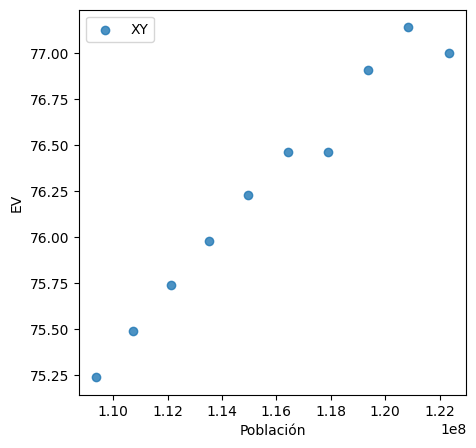

In [ ]:
plt.figure(figsize=(5, 5))
plt.scatter(x=data['Población'], y=data['EV'], alpha=0.8, label= 'XY')
plt.xlabel('Población')
plt.ylabel('EV')
plt.legend()

In [ ]:
X = pd.DataFrame({'beta0' : np.ones(data.shape[0]),
                  'beta1' : data['Población']})
y = data['EV']

modelo = sm.OLS(y, X)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     EV   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     238.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           3.09e-07
Time:                        05:30:53   Log-Likelihood:                 7.7715
No. Observations:                  10   AIC:                            -11.54
Df Residuals:                       8   BIC:                            -10.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0         59.3175      1.099     53.979      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


### Conclusión basada en resultado2

En la parte de 'coef' se tienen los valores estimados de los parámetros $\beta_0$ y $\beta_1$. Es decir:

$$
\hat{y} = 59.3175 + 1.464 \times 10^{-7}x
$$

Lo que está en la columna de 't' es el estadístico de prueba, P>|t| es el conocido como el P-value, y finalmente las de [0.025, 0.975] que es el intervalo de confianza.

#### Intervalos de confianza

El intervalo de confianza para $\beta_0$ es $[56.783, 61.852]$ y para $\beta_1$ es $[1.25 \times 10^{-7}, 1.68 \times 10^{-7}]$.

Es decir, $\beta_0 \in [56.783, 61.852]$ con un 95\% de confianza. Si repetimos el experimento 100 veces, en 95 de estos intervalos se atrapará el verdadero valor de $\beta_0$.

#### Pruebas de Hipótesis

##### Para $\beta_0$:

1. **Definir** $H_0$ **y** $H_a$:
   $$
   H_0: \beta_0 = 0
   $$
   $$
   H_a: \beta_0 \neq 0
   $$

2. **Estadístico de prueba**:
   $$
   t = \frac{\hat{\beta}_0 - \beta_0}{\text{std err}} = 53.979
   $$

3. **P-value**:
   $$
   P(|t| \leq 53.979) = 0.000
   $$

4. **Recomendación sobre** $H_0$:
   - Si $\text{p-value} \leq \alpha$, $H_0$ se rechaza: $0.000 \leq 0.05$, sí.
   - El coeficiente $\beta_0 \neq 0$, lo cual indica que $\beta_0$ explica significativamente la variable dependiente EV.

##### Para $\beta_1$:

1. **Definir** $H_0$ **y** $H_a$:
   $$
   H_0: \beta_1 = 0
   $$
   $$
   H_a: \beta_1 \neq 0
   $$

2. **Estadístico de prueba**:
   $$
   t = \frac{\hat{\beta}_1 - \beta_1}{\text{std err}} = 15.432
   $$

3. **P-value**:
   $$
   P(|t| \leq 15.432) = 0.000
   $$

4. **Recomendación sobre** $H_0$:
   - Si $\text{p-value} \leq \alpha$, $H_0$ se rechaza: $0.000 \leq 0.05$, sí.
   - El coeficiente $\beta_1 \neq 0$, es decir, la variable independiente explica significativamente la variable dependiente EV.

#### Conclusiones Generales

- **Correlación**: Hay una correlación positiva entre las variables, y esta correlación es de manera lineal.
- **Coeficiente** $\beta_1$: El resultado $\beta_1 = 1.464 \times 10^{-7}$ indica que es la contribución a la variable dependiente EV por cada unidad de la variable independiente.

Finalmente, podemos realizar inferencia específica sobre los residuos y sobre el ajuste en general:

- **R-cuadrado**: 0.967, lo que indica que el 96.7\% de la variabilidad en la variable dependiente EV es explicada por el modelo.
- **Estadístico F**: 238.1, con un P-value de 3.09e-07, indicando que el modelo es globalmente significativo.


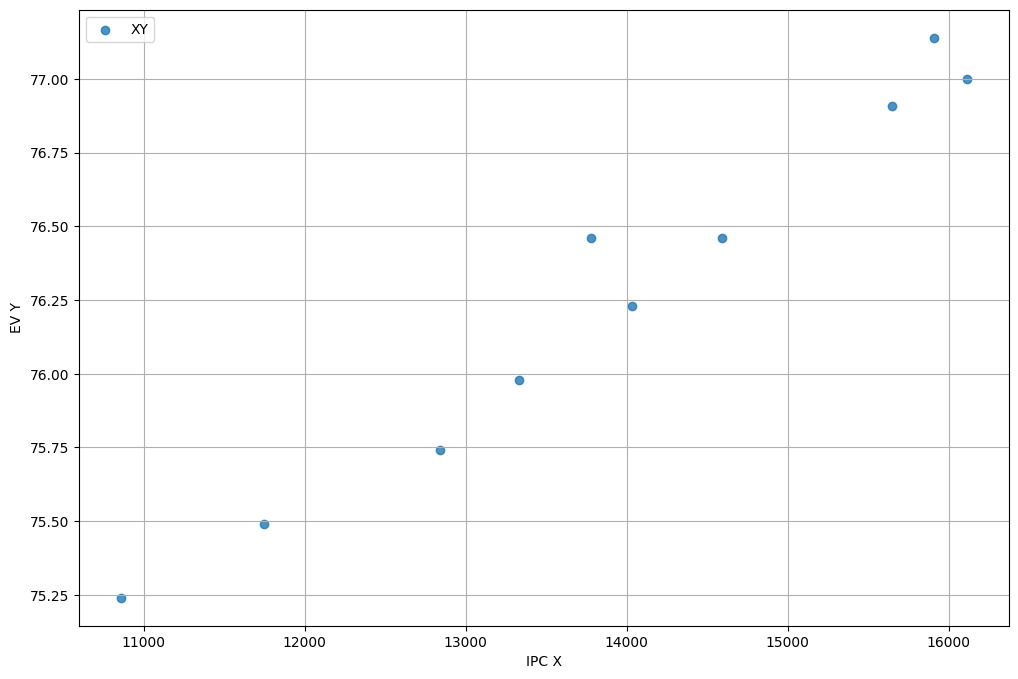

In [ ]:
# relacion entre poblacion y esperanza de vida
data = pd.read_csv('BASE.csv')[["IPC", "EV"]]
data.corr()

plt.figure(figsize=(12,8))
plt.scatter( x=data['IPC'], y=data['EV'], alpha = 0.8, label = 'XY')
plt.xlabel('IPC X'); plt.ylabel('EV Y');
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X = pd.DataFrame({'beta0' : np.ones(data.shape[0]),
                  'beta1' : data['IPC']})
Y = data['EV']

modelo = sm.OLS(Y, X)
modelo = modelo.fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                     EV   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     237.4
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           3.13e-07
Time:                        05:57:48   Log-Likelihood:                 7.7559
No. Observations:                  10   AIC:                            -11.51
Df Residuals:                       8   BIC:                            -10.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
beta0         71.2114      0.330    215.561      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


### Conclusión basada en resultado3

En la parte de 'coef' se tienen los valores estimados de los parámetros $\beta_0$ y $\beta_1$. Es decir:

$$
\hat{y} = 71.2114 + 0.0004x
$$

Lo que está en la columna de 't' es el estadístico de prueba, P>|t| es el conocido como el P-value, y finalmente las de [0.025, 0.975] que es el intervalo de confianza.

#### Intervalos de confianza

El intervalo de confianza para $\beta_0$ es $[70.450, 71.973]$ y para $\beta_1$ es $[0.00035, 0.00045]$.

Es decir, $\beta_0 \in [70.450, 71.973]$ con un 95\% de confianza. Si repetimos el experimento 100 veces, en 95 de estos intervalos se atrapará el verdadero valor de $\beta_0$.

#### Pruebas de Hipótesis

##### Para $\beta_0$:

1. **Definir** $H_0$ **y** $H_a$:
   $$
   H_0: \beta_0 = 0
   $$
   $$
   H_a: \beta_0 \neq 0
   $$

2. **Estadístico de prueba**:
   $$
   t = \frac{\hat{\beta}_0 - \beta_0}{\text{std err}} = 215.561
   $$

3. **P-value**:
   $$
   P(|t| \leq 215.561) = 0.000
   $$

4. **Recomendación sobre** $H_0$:
   - Si $\text{p-value} \leq \alpha$, $H_0$ se rechaza: $0.000 \leq 0.05$, sí.
   - El coeficiente $\beta_0 \neq 0$, lo cual indica que $\beta_0$ explica significativamente la variable dependiente EV.

##### Para $\beta_1$:

1. **Definir** $H_0$ **y** $H_a$:
   $$
   H_0: \beta_1 = 0
   $$
   $$
   H_a: \beta_1 \neq 0
   $$

2. **Estadístico de prueba**:
   $$
   t = \frac{\hat{\beta}_1 - \beta_1}{\text{std err}} = 15.407
   $$

3. **P-value**:
   $$
   P(|t| \leq 15.407) = 0.000
   $$

4. **Recomendación sobre** $H_0$:
   - Si $\text{p-value} \leq \alpha$, $H_0$ se rechaza: $0.000 \leq 0.05$, sí.
   - El coeficiente $\beta_1 \neq 0$, es decir, la variable independiente explica significativamente la variable dependiente EV.

#### Conclusiones Generales

- **Correlación**: Hay una correlación positiva entre las variables, y esta correlación es de manera lineal.
- **Coeficiente** $\beta_1$: El resultado $\beta_1 = 0.0004$ indica que es la contribución a la variable dependiente EV por cada unidad de la variable independiente.

Finalmente, podemos realizar inferencia específica sobre los residuos y sobre el ajuste en general:

- **R-cuadrado**: 0.967, lo que indica que el 96.7\% de la variabilidad en la variable dependiente EV es explicada por el modelo.
- **Estadístico F**: 237.4, con un P-value de 3.13e-07, indicando que el modelo es globalmente significativo.
